In [40]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [41]:
wine_data = pd.read_csv('data\\wine.csv')
print('*********default values*********')
print(wine_data.isnull().any())
print('*********default values numbers*********')
print(wine_data.isnull().sum())

*********default values*********
Unnamed: 0     False
country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool
*********default values numbers*********
Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64


In [42]:
Nominal_attr = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
Numeric_attr = ['points', 'price']

In [43]:
print('Data Summary')
print(wine_data[Nominal_attr + Numeric_attr].describe(include='all'))

print('counts in nominal attributes')
for nominal_attr in Nominal_attr:
    print('******' + nominal_attr + '******')
    print(wine_data[nominal_attr].value_counts())
    
print('numeric attributes')

for numeric_attr in Numeric_attr:
    print('******' + numeric_attr + '******')
    print(wine_data[numeric_attr].describe())
    print('default value counts: ', wine_data[numeric_attr].isnull().sum())
    

Data Summary
       country designation    province     region_1       region_2  \
count   150925      105195      150925       125870          60953   
unique      48       30621         455         1236             18   
top         US     Reserve  California  Napa Valley  Central Coast   
freq     62397        2752       44508         6209          13057   
mean       NaN         NaN         NaN          NaN            NaN   
std        NaN         NaN         NaN          NaN            NaN   
min        NaN         NaN         NaN          NaN            NaN   
25%        NaN         NaN         NaN          NaN            NaN   
50%        NaN         NaN         NaN          NaN            NaN   
75%        NaN         NaN         NaN          NaN            NaN   
max        NaN         NaN         NaN          NaN            NaN   

           variety           winery         points          price  
count       150930           150930  150930.000000  137235.000000  
unique    

Image plot


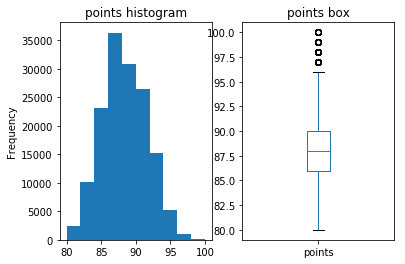

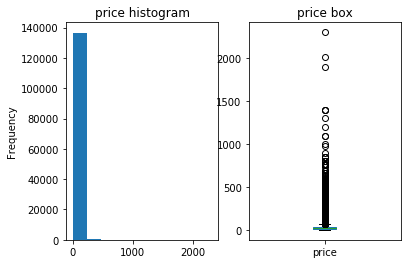

In [44]:
print('Image plot')

for numeric_attr in Numeric_attr:
    plt.subplot(1, 2, 1)
    plt.title(numeric_attr + ' histogram')
    wine_data[numeric_attr].plot(kind='hist')
    plt.subplot(1, 2, 2)
    plt.title(numeric_attr + ' box')
    wine_data[numeric_attr].to_frame().boxplot(grid=False)
    plt.show()



For Nominal attributes, we only show the top-k. The rest were named as "Others"


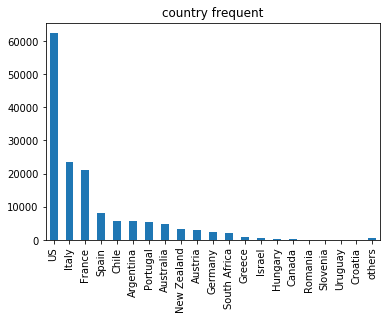

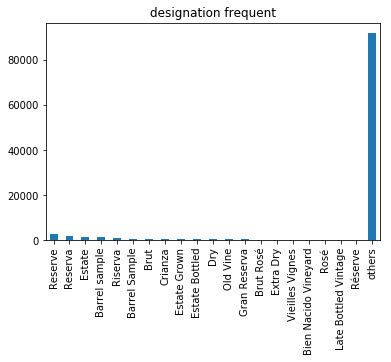

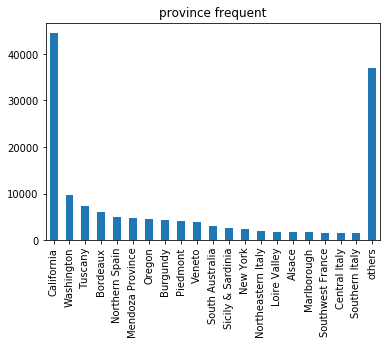

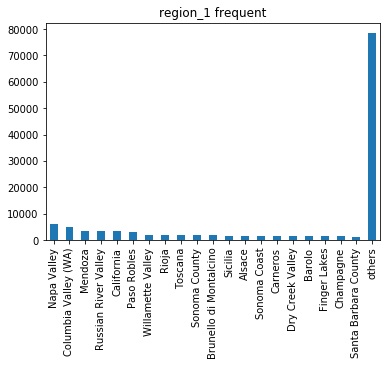

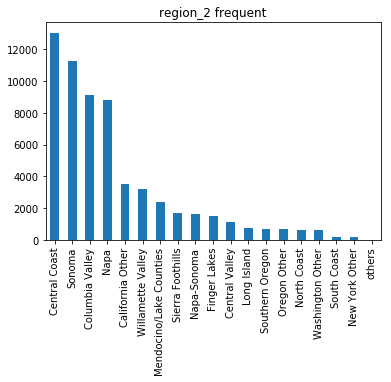

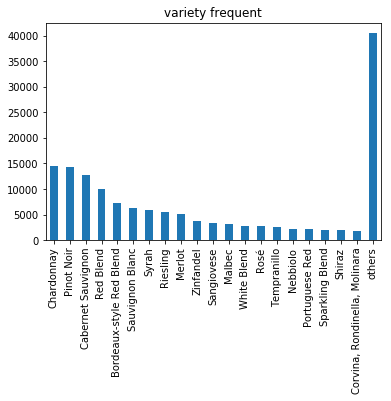

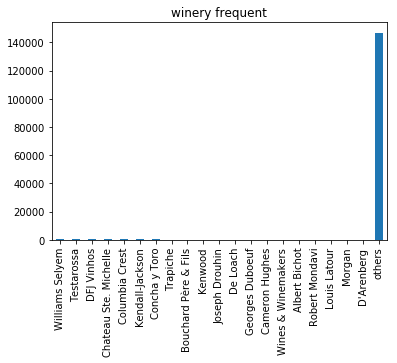

In [45]:
print('For Nominal attributes, we only show the top-k. The rest were named as "Others"')
top_k = 20
for nominal_attr in Nominal_attr:
    nomi_data = wine_data[nominal_attr].value_counts()[:top_k].copy()
    nomi_data.loc['others'] = wine_data[nominal_attr].value_counts()[top_k:].sum()
    plt.figure()
    plt.title(nominal_attr + ' frequent')
    nomi_data.plot.bar()
    plt.show()
    


Handling missing data
-------Delete missing data--------
******country******
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                  

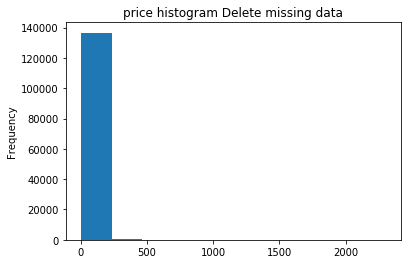

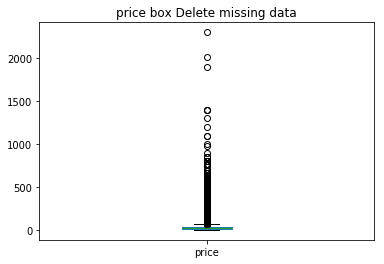

In [46]:
print('Handling missing data')
print('-------Delete missing data--------')
for nominal_attr in Nominal_attr:
    if wine_data[nominal_attr].isnull().sum() != 0:
        print('******' + nominal_attr + '******')
        print(wine_data[nominal_attr].dropna().value_counts())
        
for numeric_attr in Numeric_attr:
    if wine_data[numeric_attr].isnull().sum() != 0:
        print('******' + numeric_attr + '******')
        print(wine_data[numeric_attr].dropna().describe())
        plt.figure()
        plt.title(numeric_attr + ' histogram ' + 'Delete missing data')
        wine_data[numeric_attr].dropna().plot(kind='hist')
        plt.show()
        plt.figure()
        plt.title(numeric_attr + ' box ' + 'Delete missing data')
        wine_data[numeric_attr].dropna().to_frame().boxplot(grid=False)
        plt.show()
        

-------Replaced with mode--------
******country******
US                        62402
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia            

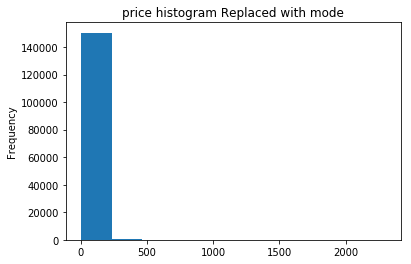

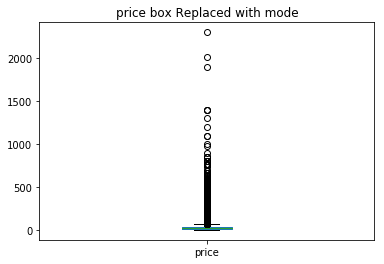

In [47]:
print('-------Replaced with mode--------')
for nominal_attr in Nominal_attr:
    if wine_data[nominal_attr].isnull().sum() != 0:
        print('******' + nominal_attr + '******')
        mode = wine_data[nominal_attr].mode().values[0]
        print(wine_data[nominal_attr].fillna(value=mode).value_counts())
        
for numeric_attr in Numeric_attr:
    if wine_data[numeric_attr].isnull().sum() != 0:
        print('******' + numeric_attr + '******')
        mode = wine_data[numeric_attr].mode().values[0]
        print(wine_data[numeric_attr].fillna(value=mode).describe())
        
        plt.figure()
        plt.title(numeric_attr + ' histogram ' + 'Replaced with mode')
        wine_data[numeric_attr].fillna(value=mode).plot(kind='hist')
        plt.show()
        plt.figure()
        plt.title(numeric_attr + ' box ' + 'Replaced with mode')
        wine_data[numeric_attr].fillna(value=mode).to_frame().boxplot(grid=False)
        plt.show()

-------Filled with correlation--------
Creat a linear model between Points and Price
count    150930.000000
mean         33.221564
std          34.638409
min           4.000000
25%          16.000000
50%          26.000000
75%          38.000000
max        2300.000000
Name: price, dtype: float64


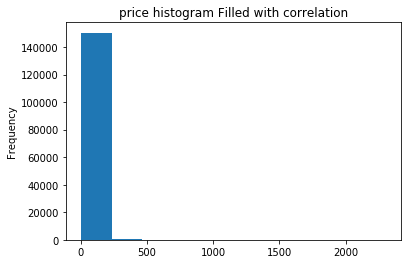

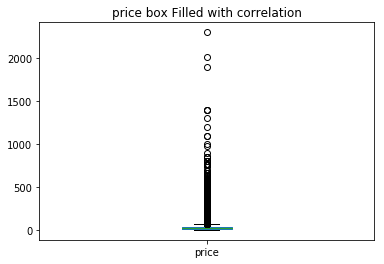

In [48]:
print('-------Filled with correlation--------')
print('Creat a linear model between Points and Price')
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=False)
train_idx, test_idx = wine_data['price'].notnull(), wine_data['price'].isnull()

x_train, y_train = wine_data['points'][train_idx].values.reshape(-1, 1), \
                   wine_data['price'][train_idx].values.reshape(-1, 1)
x_test = wine_data['points'][test_idx].values.reshape(-1, 1)
LR.fit(x_train, y_train)
y_pred = np.squeeze(LR.predict(x_test))
value = wine_data['price'][test_idx].copy()
value[:] = y_pred
print(wine_data['price'].fillna(value=value).describe())

numeric_attr = 'price'
plt.figure()
plt.title(numeric_attr + ' histogram ' + 'Filled with correlation')
wine_data[numeric_attr].fillna(value=value).plot(kind='hist')
plt.show()
plt.figure()
plt.title(numeric_attr + ' box ' + 'Filled with correlation')
wine_data[numeric_attr].fillna(value=value).to_frame().boxplot(grid=False)
plt.show()



-------Filled with record similarity--------
for missing data(Price), we take SVD method for Points in same Country
count    150930.000000
mean         32.228284
std          34.760904
min           0.000000
25%          16.000000
50%          24.000000
75%          38.000000
max        2300.000000
Name: price, dtype: float64


Using TensorFlow backend.


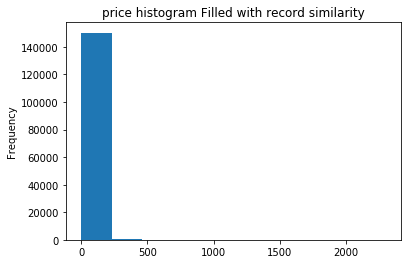

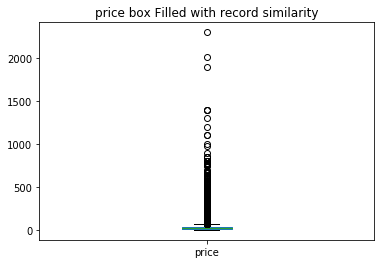

In [49]:
print('-------Filled with record similarity--------')
print('for missing data(Price), we take SVD method for Points in same Country')
from fancyimpute import SoftImpute

def fill_missing_data(cur_country, df_data):
    same_country_idx = (df_data['country'] == cur_country)
    df_data.loc[same_country_idx, ['price', 'points']] = SoftImpute(verbose=False).fit_transform(df_data[['price', 'points']][same_country_idx])

total_idx = np.arange(wine_data['price'].values.shape[0])  
null_idx = total_idx[wine_data['price'].isnull().values]
df_data = wine_data[['country', 'price', 'points']].copy()

null_idx_country_set = set(df_data['country'][null_idx].values)
for country in list(null_idx_country_set):
    fill_missing_data(country, df_data)

print(df_data['price'].describe())

numeric_attr = 'price'
plt.figure()
plt.title(numeric_attr + ' histogram ' + 'Filled with record similarity')
df_data['price'].plot(kind='hist')
plt.show()
plt.figure()
plt.title(numeric_attr + ' box ' + 'Filled with record similarity')
df_data['price'].to_frame().boxplot(grid=False)
plt.show()

